<a href="https://colab.research.google.com/github/domoto86/lcbo-clustering/blob/main/LCBO_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
main_data_df = pd.read_csv('lcbo_wines.csv')

In [55]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Sugar Content,Varietal,By,Release Date,Lat,Lon,Savings
0,Paul Mas Cabernet Sauvignon,14.95,12.95,NaN,(0),750 ml bottle,Paul Mas vineyards are in the Languedoc region...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.135,"Languedoc, France",5 g/L,Cabernet Sauvignon,NaN,NaN,47.218868,5.965036,2.0
1,Blu Giovello Prosecco,18.00,15.50,4.4,(9),750 ml bottle,The prosecco in the distinctive blue bottle. I...,White Sparkling Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.110,Italy,14 g/L,Prosecco,Blu Giovello,NaN,42.638426,12.674297,2.5
2,Aveleda Vinho Verde,15.00,14.00,4.8,(12),750 ml bottle,Aveleda has been a family-owned business since...,White Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.095,"Vinho Verde, Portugal",14 g/L,Vinho Verde,Aveleda,NaN,41.067500,-8.237269,1.0
3,Jacob's Creek Moscato Rosé,16.00,14.00,4.7,(17),750 ml bottle,"Jacob's Creek Moscato is a fresh and fragrant,...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.075,Australia,70 g/L,Rose Wines,Jacob's Creek,NaN,-24.776109,134.755000,2.0
4,Sandbanks Summer Rosé VQA,14.95,12.95,NaN,(0),750 ml bottle,"Established in Prince Edward County in 2001, S...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.116,"Ontario, Canada",27 g/L,Rosé,Sandbanks,NaN,50.000678,-86.000977,2.0


In [56]:
main_data_df.dtypes


Name              object
Regular Price    float64
Sale Price       float64
Rating           float64
Reviews           object
Size              object
Description       object
Category          object
Image             object
Alcohol/Vol      float64
Made In           object
Sugar Content     object
Varietal          object
By                object
Release Date      object
Lat              float64
Lon              float64
Savings          float64
dtype: object

In [57]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content'].str.replace('g/L', '')
# main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].str.replace('%', '')
main_data_df = main_data_df.fillna(0)
main_data_df = main_data_df.drop(['Sugar Content'], axis = 1)

In [58]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content (g/L)'].astype(float)
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol']  * 100
main_data_df['Regular Price'] = main_data_df['Regular Price'].astype(float)
main_data_df['Sale Price'] = main_data_df['Sale Price'].astype(float)

In [59]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 50 non-null     object 
 1   Regular Price        50 non-null     float64
 2   Sale Price           50 non-null     float64
 3   Rating               50 non-null     float64
 4   Reviews              50 non-null     object 
 5   Size                 50 non-null     object 
 6   Description          50 non-null     object 
 7   Category             50 non-null     object 
 8   Image                50 non-null     object 
 9   Alcohol/Vol          50 non-null     float64
 10  Made In              50 non-null     object 
 11  Varietal             50 non-null     object 
 12  By                   50 non-null     object 
 13  Release Date         50 non-null     object 
 14  Lat                  50 non-null     float64
 15  Lon                  50 non-null     float

In [60]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,Sugar Content (g/L)
0,Paul Mas Cabernet Sauvignon,14.95,12.95,0.0,(0),750 ml bottle,Paul Mas vineyards are in the Languedoc region...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"Languedoc, France",Cabernet Sauvignon,0,0,47.218868,5.965036,2.0,5.0
1,Blu Giovello Prosecco,18.00,15.50,4.4,(9),750 ml bottle,The prosecco in the distinctive blue bottle. I...,White Sparkling Wine,https://aem.lcbo.com/content/dam/lcbo/products...,11.0,Italy,Prosecco,Blu Giovello,0,42.638426,12.674297,2.5,14.0
2,Aveleda Vinho Verde,15.00,14.00,4.8,(12),750 ml bottle,Aveleda has been a family-owned business since...,White Wine,https://aem.lcbo.com/content/dam/lcbo/products...,9.5,"Vinho Verde, Portugal",Vinho Verde,Aveleda,0,41.067500,-8.237269,1.0,14.0
3,Jacob's Creek Moscato Rosé,16.00,14.00,4.7,(17),750 ml bottle,"Jacob's Creek Moscato is a fresh and fragrant,...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,7.5,Australia,Rose Wines,Jacob's Creek,0,-24.776109,134.755000,2.0,70.0
4,Sandbanks Summer Rosé VQA,14.95,12.95,0.0,(0),750 ml bottle,"Established in Prince Edward County in 2001, S...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,11.6,"Ontario, Canada",Rosé,Sandbanks,0,50.000678,-86.000977,2.0,27.0


In [61]:
main_data_df['Category'].value_counts()

Red Wine                     25
White Wine                   15
Rose Wine                     6
White Sparkling Wine          3
Rosé & Red Sparkling Wine     1
Name: Category, dtype: int64

In [62]:
main_data_df['Category']=main_data_df['Category'].astype('category').cat.codes

In [63]:
main_data_df.head(2)

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,Sugar Content (g/L)
0,Paul Mas Cabernet Sauvignon,14.95,12.95,0.0,(0),750 ml bottle,Paul Mas vineyards are in the Languedoc region...,0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"Languedoc, France",Cabernet Sauvignon,0,0,47.218868,5.965036,2.0,5.0
1,Blu Giovello Prosecco,18.00,15.50,4.4,(9),750 ml bottle,The prosecco in the distinctive blue bottle. I...,3,https://aem.lcbo.com/content/dam/lcbo/products...,11.0,Italy,Prosecco,Blu Giovello,0,42.638426,12.674297,2.5,14.0


In [65]:
main_scaled= StandardScaler().fit_transform(main_data_df[[
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category']])
main_scaled

array([[-0.56634177, -0.57126626,  0.45179077, -0.32165986, -0.86516854],
       [-0.25985802, -0.30024692, -1.06225336,  0.57738944,  0.82022472],
       [-0.56131745, -0.45967006, -1.97067983,  0.57738944,  1.38202247],
       [-0.46083097, -0.45967006, -3.18191513,  6.17147403, -0.30337079],
       [-0.56634177, -0.57126626, -0.69888277,  1.87601622, -0.30337079],
       [-0.71707149, -0.6244073 , -0.15382688, -0.5214486 , -0.86516854],
       [-0.0639094 , -0.03985579,  0.45179077, -0.02197676, -0.86516854],
       [-0.35029585, -0.44904185,  0.14898194, -0.32165986,  1.38202247],
       [-0.66682825, -0.67754835, -0.45663571, -0.2217655 , -0.30337079],
       [ 0.43852298,  0.49155469,  1.05740842, -0.32165986, -0.86516854],
       [-0.56634177, -0.57126626,  0.45179077, -0.2217655 ,  1.38202247],
       [-0.56634177, -0.57126626,  0.14898194, -0.62134297, -0.30337079],
       [-0.46083097, -0.45967006,  0.14898194, -0.62134297,  1.38202247],
       [ 0.7399824 ,  0.70411887,  0.6

In [66]:

main_scaled_df = pd.DataFrame(main_scaled, columns = [
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category'])

In [67]:
main_scaled_df.sample(20)

,Regular Price,Sale Price,Alcohol/Vol,Sugar Content (g/L),Category
29,-0.154347,-0.241792,-1.062253,0.677284,0.820225
17,-0.068934,-0.045170,0.451791,-0.121871,1.382022
21,-0.867801,-0.783830,0.451791,-0.521449,-0.865169
48,-0.063909,-0.039856,0.451791,-0.421554,-0.865169
39,2.558788,2.627825,-0.153827,-0.421554,1.382022
1,-0.259858,-0.300247,-1.062253,0.577389,0.820225
5,-0.717071,-0.624407,-0.153827,-0.521449,-0.865169
7,-0.350296,-0.449042,0.148982,-0.321660,1.382022
33,1.141928,1.235529,0.451791,-0.621343,1.382022
26,-0.666828,-0.677548,0.451791,-0.621343,-0.865169


In [68]:
inertia=[]
k=list(range(1, 15))

In [69]:
for i in k:
    category_model=KMeans(n_clusters=i, random_state=0)
    category_model.fit(main_scaled_df)
    inertia.append(category_model.inertia_)

/Users/johnp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnp/anacond

In [70]:
category_elbow = {'k':k, 'inertia':inertia}
elbow_df = pd.DataFrame(category_elbow)

In [71]:
elbow_df.head()

,k,inertia
0,1,250.000000
1,2,170.681133
2,3,113.334072
3,4,68.827626
4,5,50.431964


<Axes: xlabel='k'>

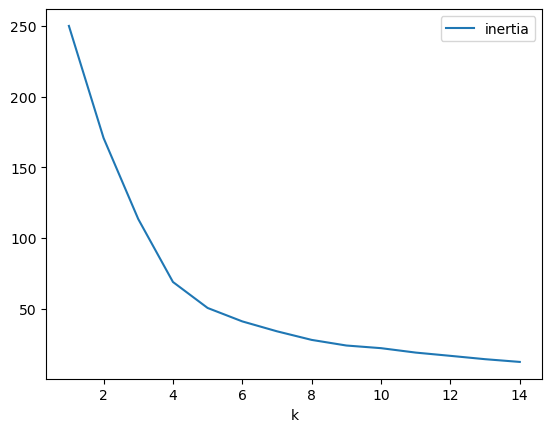

In [72]:
elbow_df.plot('k', 'inertia')

In [73]:
model=KMeans(n_clusters=5, random_state=0)

In [74]:
model.fit(main_scaled_df)

/Users/johnp/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [75]:
category_predict_df = model.predict(main_scaled_df)

In [76]:
main_data_df['Segment'] = category_predict_df

In [77]:
main_data_df.sample(10)


,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,Sugar Content (g/L),Segment
37,Belle Glos Clark & Telephone Pinot Noir 2019,59.95,54.95,4.3,(3),750 ml bottle,The 2019 Pinot Noir Clark & Telephone is a pot...,0,https://aem.lcbo.com/content/dam/lcbo/products...,14.9,"California, United States",Pinot Noir,Belle Glos,"September 10, 2022",36.701463,-118.755997,5.0,7.0,3
23,Bersano Costalunga Barbera D'Asti DOCG,17.00,14.00,4.6,(11),750 ml bottle,"Bright garnet hue; spice, smoke and plum notes...",0,https://aem.lcbo.com/content/dam/lcbo/products...,14.0,"Piedmont, Italy",Barbera,Bersano,0,46.067065,8.378351,3.0,3.0,1
21,Caliterra Cabernet Sauvignon,11.95,10.95,5.0,(6),750 ml bottle,"Ruby red colour; lifted chocolate, herbs, smok...",0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,Chile,Cabernet Sauvignon,Caliterra,0,-31.761336,-71.318770,1.0,3.0,1
41,Franzia Cabernet Sauvignon,39.80,36.80,4.0,(2),3000 ml bagnbox,California's Franzia has mastered wine packagi...,0,https://aem.lcbo.com/content/dam/lcbo/products...,12.5,"California, United States",Cabernet Sauvignon,0,0,36.701463,-118.755997,3.0,9.0,3
44,Astoria Prosecco,20.05,18.05,5.0,(3),750 ml bottle,"Pale straw, light mousse; lifted, floral, yeas...",3,https://aem.lcbo.com/content/dam/lcbo/products...,11.0,Italy,Prosecco,Astoria,0,42.638426,12.674297,2.0,12.0,2
16,Wente Southern Hills Cabernet Sauvignon,21.20,18.20,4.8,(4),750 ml bottle,Medium ruby purple colour; extra dry and mediu...,0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,United States,Cabernet Sauvignon,Wente,0,39.783730,-100.445882,3.0,6.0,1
43,Masi Costasera Amarone Classico DOC,55.00,51.00,4.8,(12),750 ml bottle,"Deep purple ruby colour; rich, ripe, dark frui...",0,https://aem.lcbo.com/content/dam/lcbo/products...,15.0,"Veneto, Italy",Amarone,Masi,0,45.647666,11.866525,4.0,8.0,3
19,Oyster Bay Sauvignon Blanc,21.95,18.95,4.7,(73),750 ml bottle,Popular Oyster Bay hails from the Marlborough ...,4,https://aem.lcbo.com/content/dam/lcbo/products...,12.5,"Marlborough, New Zealand",Sauvignon Blanc,Oyster Bay,"April 1, 2021",-36.784622,174.723989,3.0,5.0,0
17,Bread & Butter Chardonnay,19.90,17.90,3.6,(37),750 ml bottle,"Based in California, Bread & Butter makes appr...",4,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"California, United States",Chardonnay,Bread & Butter,0,36.701463,-118.755997,2.0,7.0,0
10,Woodbridge By Robert Mondavi Chardonnay,14.95,12.95,4.5,(217),750 ml bottle,The colour is a bright pale lemon; aromas of r...,4,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"California, United States",Chardonnay,Woodbridge By Robert Mondavi,0,36.701463,-118.755997,2.0,6.0,0


In [78]:
main_data_df['Segment'].value_counts()

1    25
0    12
2     8
3     4
4     1
Name: Segment, dtype: int64

<Axes: xlabel='Sugar Content (g/L)', ylabel='Segment'>

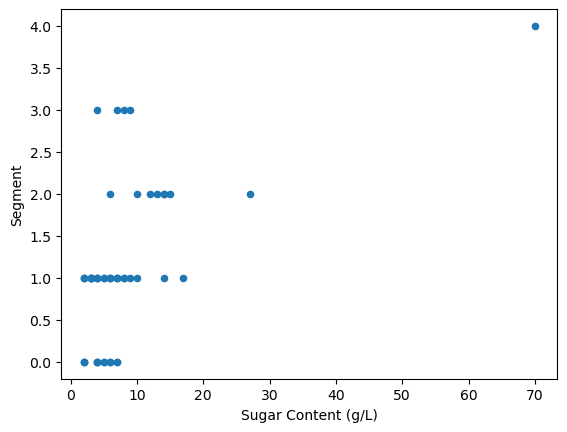

In [79]:
main_data_df.plot.scatter('Sugar Content (g/L)','Segment')

<Axes: xlabel='Segment', ylabel='Sugar Content (g/L)'>

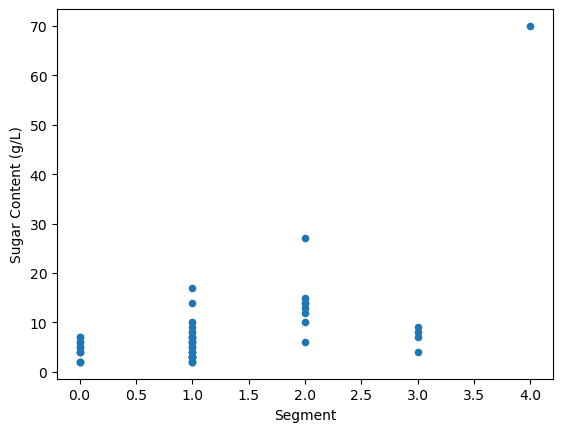

In [80]:
main_data_df.plot.scatter('Segment', 'Sugar Content (g/L)')

In [81]:
main_data_df.to_csv('sugar_recommendation.csv', index = False)